In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
netflix = pd.read_csv("netflix_titles.csv")

In [11]:
netflix.head()
#Herbir film ve dizi id'ye sahip
#type ile dizi mi yoksa film mi tipini belirtiyor
#director kısmında yönetmenden bahsediliyor
#cast ile oyuncu kadrosu belirtiliyor
#country ile hangi ülke olduğu ve date_added ile eklenme tarihi veriliyor
#release_year ile çıkış yılı veriliyor
#ratingler ve süreler veriliyor

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
netflix.shape
#8807 satır ve 12 sütundan oluşan bir dataset

(8807, 12)

In [14]:
netflix.columns
#sütun isimleri

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
netflix.isnull().sum()
#eksik(boş) veri var mı ?

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
netflix.nunique()
#tekrar etmeyen veriler
#type'ta iki farklı veri tipi var show_id'de 8807 farklı veri var

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [17]:
data=netflix.copy()
#verileri data isimli bir klasöre atadık

In [19]:
data.shape
#tekrar verileri kontrol ettik

(8807, 12)

In [20]:
data =data.dropna()
#boş verileri kaldırarak veri temizliği yaptık

In [21]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [22]:
data.shape
#verimiz 8807'den 5332'ye düştü boş veriler temizlendi

(5332, 12)

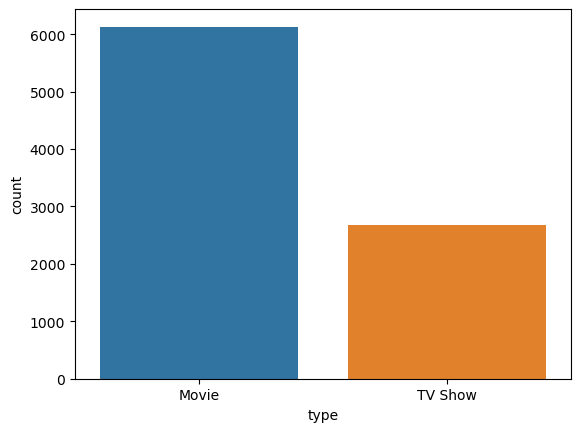

<Figure size 500x500 with 0 Axes>

In [35]:
# Veri çerçevesi (netflix) üzerinden "type" sütununun değerlerini sayarak bir çubuk grafiği çizin
sns.countplot(data=netflix, x="type")

# Grafik boyutunu ayarlayın
plt.figure(figsize=(5, 5))

# Grafiği gösterin
plt.show()

#6000.. tane film 2500.. tane TV show'dan oluşuyor

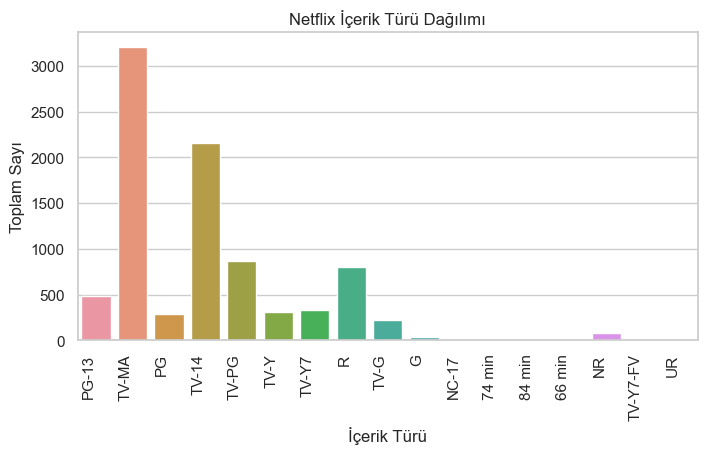

In [51]:
# Veri çerçevesi (netflix) üzerinden "type" sütununun değerlerini sayarak bir çubuk grafiği çizin
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
sns.countplot(data=netflix, x="rating")

# x ekseni etiketlerini düzenleme
plt.xticks(rotation=90, ha="right")
plt.xlabel("İçerik Türü")
plt.ylabel("Toplam Sayı")
plt.title("Netflix İçerik Türü Dağılımı")

# Grafiği gösterin
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

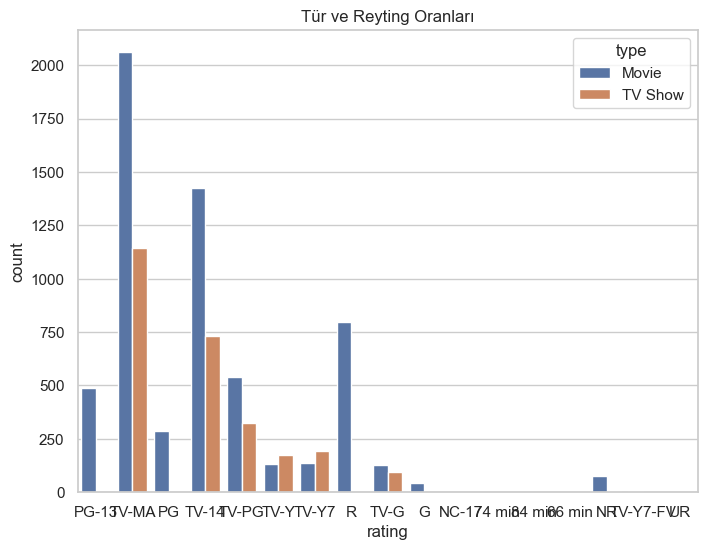

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(x="rating", hue="type", data=netflix)
plt.title("Tür ve Reyting Oranları")
plt.show

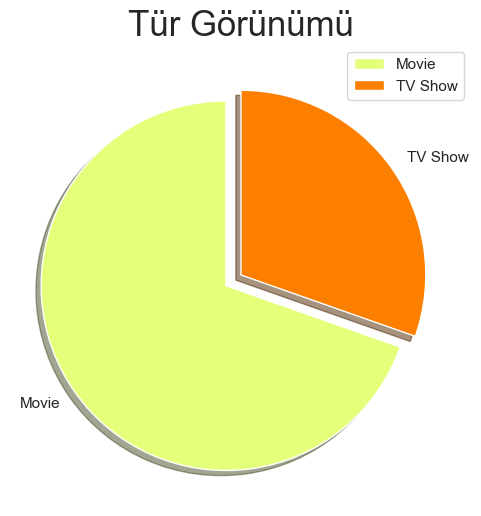

In [53]:
labels = ["Movie", "TV Show"]
size = netflix["type"].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0.1, 0]  # Eğer bir dilimin belirginleşmesini istiyorsanız 0.1 gibi bir değer verebilirsiniz.

plt.rcParams["figure.figsize"] = (6,6)
plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title("Tür Görünümü", fontsize=25)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

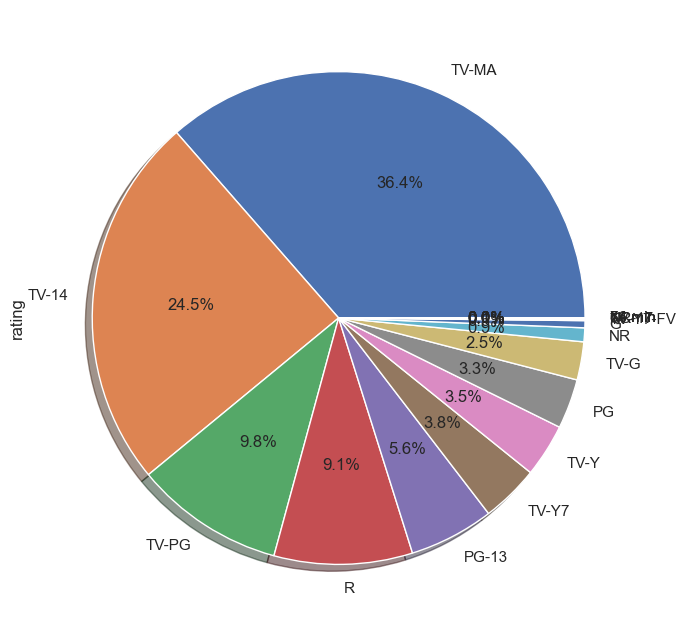

In [43]:
netflix["rating"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True, figsize=(10,8))
plt.show

In [46]:
from wordcloud import WordCloud

In [45]:
pip install wordcloud


     ------------------------------------ 152.1/152.1 kB 503.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


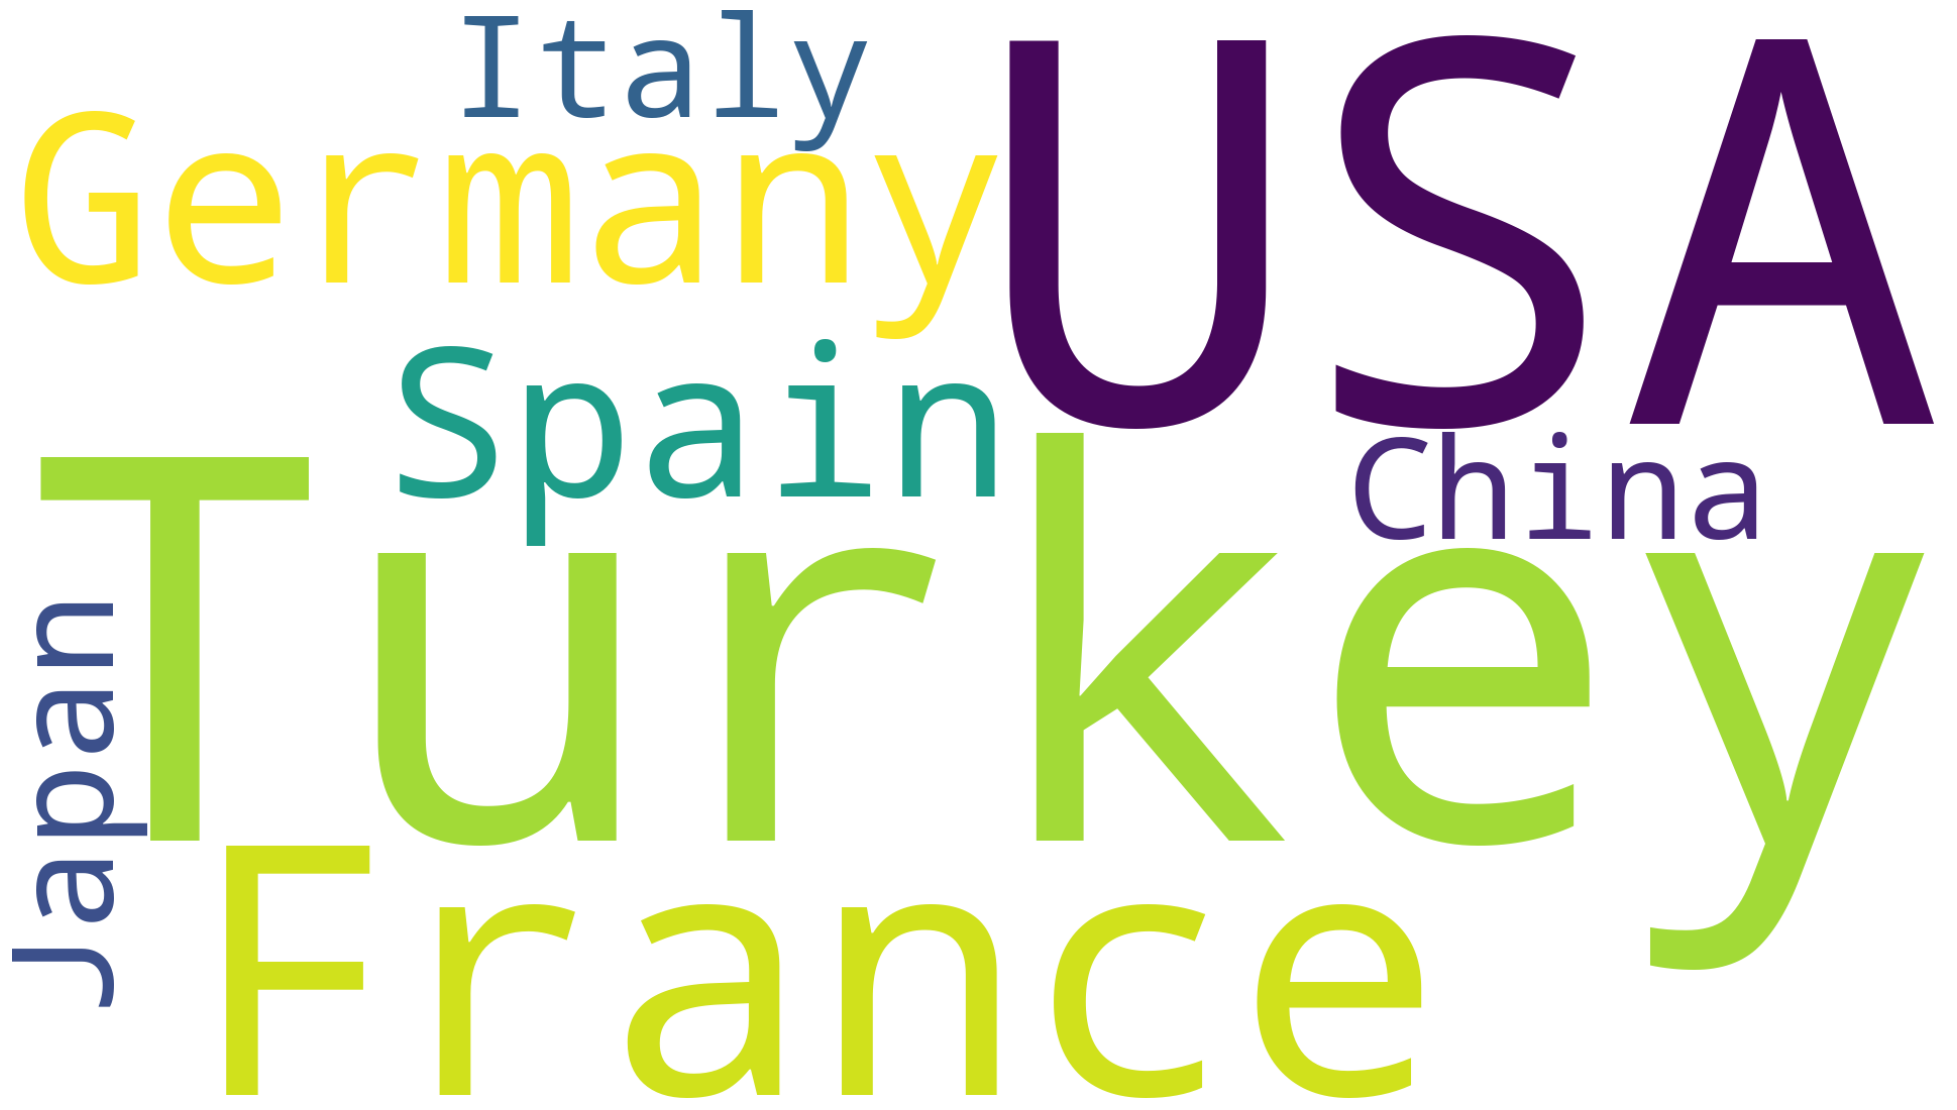

In [50]:
plt.figure(figsize=(25, 15))

# Örnek bir ülke listesi (data) oluşturun (veri yapınıza göre güncelleyin)
country_data = ["Turkey", "USA", "France", "Germany", "Spain", "Italy", "China", "Japan"]

# Ülkeleri bir araya getirerek bir metin oluşturun
country_text = " ".join(country_data)

wordcloud = WordCloud(
    background_color="white",
    width=1920,
    height=1081
).generate(country_text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("country.png")
plt.show()